In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import json
import sys
# setting path
sys.path.append('../common')
import utils

SETUP_PATH = 'setup.json'
f = open(SETUP_PATH)
data = json.load(f)

In [2]:
# Clear database
import requests

clear_url = data['app']['clearUrl']
print(clear_url)
response = requests.post(clear_url)
print(response.content)
print(response.status_code)

http://localhost:5029/Member/clear/
b'Count of Members: 0'
200


In [3]:
def run_k6(app: dict, script_path: str, vus: int, dir_name):
    !k6 run {script_path} \
        --env vus={vus} \
        --env url={app["url"]} \
        --out json={dir_name}/{app["name"]}.json \
        --out csv={dir_name}/{app["name"]}.csv

## Run k6 test script

In [4]:
import os
import shutil
from datetime import datetime
import math 



# prepare directory structure
if not os.path.exists(data["test_result_base_dir"]):
    os.makedirs(data["test_result_base_dir"])

dt_string = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
print("date and time =", dt_string)

dir_name = f'./{data["test_result_base_dir"]}/{data["test_result_dir_prefix"]}{dt_string}'
print(dir_name)
if not os.path.exists(dir_name):
    os.makedirs(dir_name)
    
# copy script
shutil.copy(data["script_path"], dir_name)
shutil.copy(SETUP_PATH, dir_name)

out_file_name = "out_empty.txt"
out_file = open(out_file_name, "a")
out_file.write(f'\n-------------------------')
out_file.close()

vus = 8192 # initial value
beg = 1
end = None
threshold = 0
while (True):
    # run test
    run_k6(data["app"], script_path=data["script_path"], vus=vus, dir_name=dir_name)

    # load dataframe
    dir = utils.get_last_result_dir(setup_data=data)
    path = f'./{dir}/{data["app"]["name"]}.csv'
    df = pd.read_csv(path)

    # calculate metric
    incorrect_part = utils.get_incorrect_part(df)
        
    print(f'Incorrect part for vus = {vus}: {incorrect_part}\n')

    out_file = open(out_file_name, "a")
    out_file.write(f'\nvus = {vus}, beg = {beg}, end = {end}, incorrect_part = {incorrect_part}')
    out_file.close()

    if (incorrect_part > threshold):
        end = vus
        vus = math.floor((end + beg) / 2)
    else:
        beg = vus
        vus = vus * 2 if end == None else math.floor((end + beg) / 2)
    
    if end and end - beg < 2:
        break
        


date and time = 2023-11-04_18-23-47
./out/out_2023-11-04_18-23-47



          /\      |‾‾| /‾‾/   /‾‾/   
     /\  /  \     |  |/  /   /  /    
    /  \/    \    |     (   /   ‾‾\  
   /          \   |  |\  \ |  (‾)  | 
  / __________ \  |__| \__\ \_____/ .io

  execution: local
     script: ../../grafana-k6/script.js
     output: json (./out/out_2023-11-04_18-23-47/dotnet.json), csv (./out/out_2023-11-04_18-23-47/dotnet.csv)

  scenarios: (100.00%) 1 scenario, 8192 max VUs, 1m0s max duration (incl. graceful stop):
           * default: 8192 looping VUs for 30s (gracefulStop: 30s)


Init      [>-------------------------------------] 0258/8192 VUs initialized
default   [--------------------------------------]

Init      [=>------------------------------------] 0594/8192 VUs initialized
default   [--------------------------------------]

Init      [==>-----------------------------------] 0761/8192 VUs initialized
default   [--------------------------------------]

Init      [===>----------------------------------] 1070/8192 VUs initialized
default   [--

/tmp/ipykernel_448923/90028523.py:40: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


Incorrect part for vus = 16384: 0.013833205814843152


          /\      |‾‾| /‾‾/   /‾‾/   
     /\  /  \     |  |/  /   /  /    
    /  \/    \    |     (   /   ‾‾\  
   /          \   |  |\  \ |  (‾)  | 
  / __________ \  |__| \__\ \_____/ .io

  execution: local
     script: ../../grafana-k6/script.js
     output: json (./out/out_2023-11-04_18-23-47/dotnet.json), csv (./out/out_2023-11-04_18-23-47/dotnet.csv)

  scenarios: (100.00%) 1 scenario, 12288 max VUs, 1m0s max duration (incl. graceful stop):
           * default: 12288 looping VUs for 30s (gracefulStop: 30s)


Init      [--------------------------------------] 00044/12288 VUs initialized
default   [--------------------------------------]

Init      [>-------------------------------------] 00335/12288 VUs initialized
default   [--------------------------------------]

Init      [>-------------------------------------] 00567/12288 VUs initialized
default   [--------------------------------------]

Init      [=>---------------

## Smoke Processing data

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np

In [ ]:
import sys
# setting path
sys.path.append('../common')
import utils


dir = utils.get_last_result_dir(setup_data=data)
print(dir)
path = f'.{data["test_result_base_dir"]}/{dir}/django.json'
print(path)
df = pd.read_csv(f'{dir}/django.csv')


out/out_2023-10-14_14-53-04
.out/out/out_2023-10-14_14-53-04/django.json


In [ ]:
path = f'./{dir}/{data["app"]["name"]}.csv'
df = pd.read_csv(path)

0.0

In [ ]:
df.head()

,metric_name,timestamp,metric_value,check,error,error_code,expected_response,group,method,name,proto,scenario,service,status,subproto,tls_version,url,extra_tags,metadata
0,http_reqs,1697287988,1.000000,NaN,NaN,NaN,True,NaN,GET,http://localhost:8000/collisions/,HTTP/1.1,default,NaN,200.0,NaN,NaN,http://localhost:8000/collisions/,NaN,NaN
1,http_req_duration,1697287988,21.824395,NaN,NaN,NaN,True,NaN,GET,http://localhost:8000/collisions/,HTTP/1.1,default,NaN,200.0,NaN,NaN,http://localhost:8000/collisions/,NaN,NaN
2,http_req_blocked,1697287988,0.585770,NaN,NaN,NaN,True,NaN,GET,http://localhost:8000/collisions/,HTTP/1.1,default,NaN,200.0,NaN,NaN,http://localhost:8000/collisions/,NaN,NaN
3,http_req_connecting,1697287988,0.313478,NaN,NaN,NaN,True,NaN,GET,http://localhost:8000/collisions/,HTTP/1.1,default,NaN,200.0,NaN,NaN,http://localhost:8000/collisions/,NaN,NaN
4,http_req_tls_handshaking,1697287988,0.000000,NaN,NaN,NaN,True,NaN,GET,http://localhost:8000/collisions/,HTTP/1.1,default,NaN,200.0,NaN,NaN,http://localhost:8000/collisions/,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   metric_name        450 non-null    object 
 1   timestamp          450 non-null    int64  
 2   metric_value       450 non-null    float64
 3   check              0 non-null      float64
 4   error              0 non-null      float64
 5   error_code         0 non-null      float64
 6   expected_response  270 non-null    object 
 7   group              0 non-null      float64
 8   method             270 non-null    object 
 9   name               270 non-null    object 
 10  proto              270 non-null    object 
 11  scenario           390 non-null    object 
 12  service            0 non-null      float64
 13  status             270 non-null    float64
 14  subproto           0 non-null      float64
 15  tls_version        0 non-null      float64
 16  url                270 non

In [ ]:
df['metric_name'].unique()

array(['http_reqs', 'http_req_duration', 'http_req_blocked',
       'http_req_connecting', 'http_req_tls_handshaking',
       'http_req_sending', 'http_req_waiting', 'http_req_receiving',
       'http_req_failed', 'vus', 'vus_max', 'data_sent', 'data_received',
       'iteration_duration', 'iterations'], dtype=object)

[Text(0, 0, '30'),
 Text(0, 0, '30'),
 Text(0, 0, '30'),
 Text(0, 0, '30'),
 Text(0, 0, '30'),
 Text(0, 0, '30'),
 Text(0, 0, '30'),
 Text(0, 0, '30'),
 Text(0, 0, '30'),
 Text(0, 0, '30'),
 Text(0, 0, '30'),
 Text(0, 0, '30'),
 Text(0, 0, '30'),
 Text(0, 0, '30'),
 Text(0, 0, '30')]

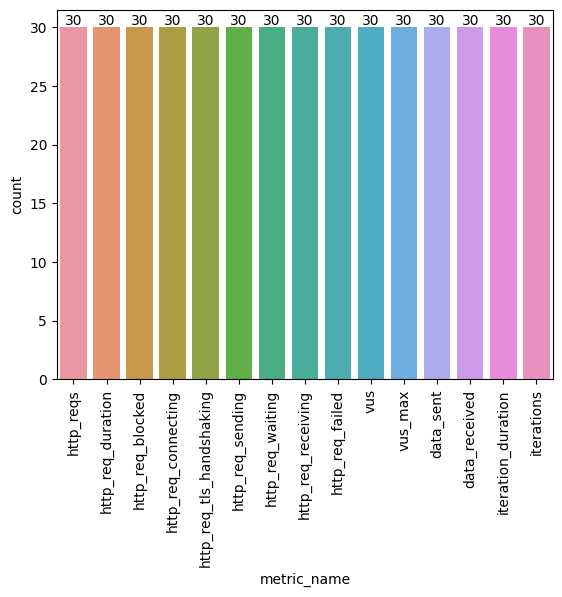

In [ ]:
chart = sns.countplot(data=df, x='metric_name')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart.bar_label(chart.containers[0])


In [ ]:
df.shape

(450, 19)

In [ ]:
df_1 = df.loc[(df['metric_name'] == 'http_req_duration')]
df_1.shape


(30, 19)

In [ ]:
df_1.head()

,metric_name,timestamp,metric_value,check,error,error_code,expected_response,group,method,name,proto,scenario,service,status,subproto,tls_version,url,extra_tags,metadata
8,http_req_failed,1697287988,0.0,NaN,NaN,NaN,True,NaN,GET,http://localhost:8000/collisions/,HTTP/1.1,default,NaN,200.0,NaN,NaN,http://localhost:8000/collisions/,NaN,NaN
23,http_req_failed,1697287989,0.0,NaN,NaN,NaN,True,NaN,GET,http://localhost:8000/collisions/,HTTP/1.1,default,NaN,200.0,NaN,NaN,http://localhost:8000/collisions/,NaN,NaN
38,http_req_failed,1697287990,0.0,NaN,NaN,NaN,True,NaN,GET,http://localhost:8000/collisions/,HTTP/1.1,default,NaN,200.0,NaN,NaN,http://localhost:8000/collisions/,NaN,NaN
53,http_req_failed,1697287991,0.0,NaN,NaN,NaN,True,NaN,GET,http://localhost:8000/collisions/,HTTP/1.1,default,NaN,200.0,NaN,NaN,http://localhost:8000/collisions/,NaN,NaN
68,http_req_failed,1697287992,0.0,NaN,NaN,NaN,True,NaN,GET,http://localhost:8000/collisions/,HTTP/1.1,default,NaN,200.0,NaN,NaN,http://localhost:8000/collisions/,NaN,NaN
